In [1]:
# zadanie 2
# element nie moze byc przy scianie 
# zrobic kontener na mapie i wepchnac wszystkie kule do kontenera
# wpychamy tylko jedna kule do kontenera
# mozemy pchac tylko jedna kule 
# element nie moze pojawic sie na krawedzi
# nie dopchnac kuli do krawedzi bo wtedy nie wygramy
# jak cztery kule tworza kwadrat wtedy nie da sie wygrac
# zrob tak aby kule nie spalnowaly sie na tym samym miejscu

In [2]:
# Task 2
# the item can't be against the wall 
# make a container on the map and push all the balls into the container
# we can only push one ball into the container at the same time
# we can only push one ball 
# the item can't appear on the edge
# don't push the ball to the edge or you won't win
# if four balls form a square, you can't win
# make it so the balls don't burn in the same place

useful links:
-    https://mathsathome.com/calculating-bearings/#:~:text=If%20given%20the%20bearing%20from,from%20A%20is%20050%C2%B0 

Loose notes:
- In mathematics, a **bearing** is defined as an angle measured clockwise from north.
- The **true bearing** is the angle measured clockwise from north. The true bearing is often referred to simply as the bearing.
- The **relative bearing** is the angle between the direction of travel and some other direction. This angle is measured 
- A **quadrant bearing** is the angle made between a north or south direction and an east or west direction. North or south is written first, then the angle, then east or west. For example, a quadrant bearing of S30°W means to start facing south then make a 30° angle towards the west.clockwise from the current direction.
    - #### math.degrees(math.atan(6/10))

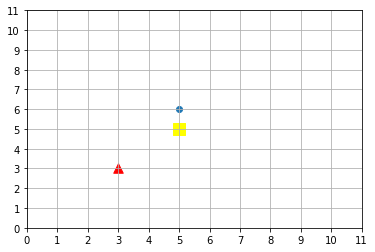

[[5, 6]]
[3, 3]


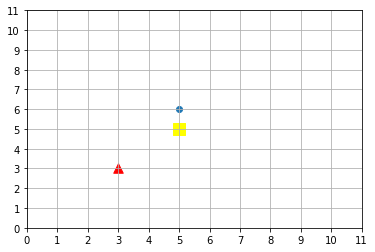

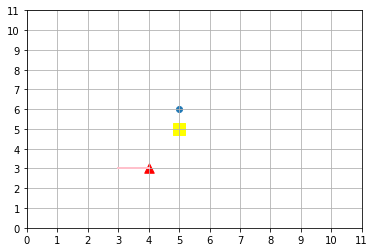

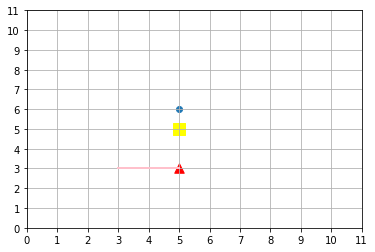

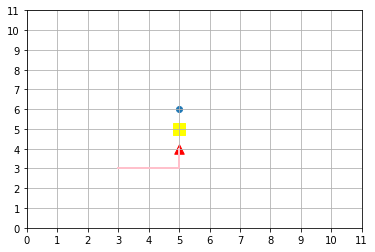

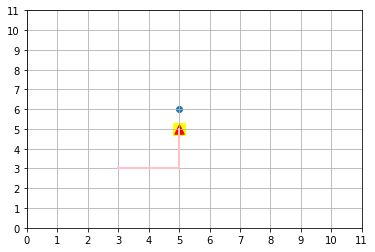

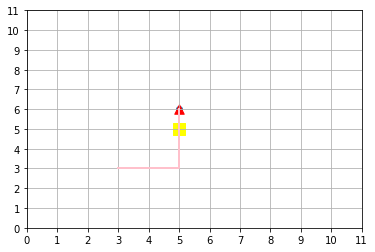

In [41]:
import random
import time
import math

import matplotlib.pyplot as plt

def find_neighbours(next_node,height, obstacles_coordinates):
    neighbours_nodes = []
    neighbours = []

    for i in ["left", "right", "up", "down"]:
        if next_node[0] - 1 >= 1: # to not to move bole to the walls we use 1 instead of 0
            left = [next_node[0]  - 1, next_node[1]]
            if left not in obstacles_coordinates:
                neighbours.append("L")
                neighbours_nodes.append(left)
        if next_node[0] + 1 < height - 1: # to not to move bole to the walls we - 1
            right = [next_node[0]  + 1, next_node[1]]
            if right not in obstacles_coordinates:
                neighbours.append("R")
                neighbours_nodes.append(right)
        if next_node[1] + 1 < height  - 1: # to not to move bole to the walls we - 1
            down = [next_node[0], next_node[1] + 1]
            if down not in obstacles_coordinates:
                neighbours.append("U")
                neighbours_nodes.append(down)
        if next_node[1] - 1 >= 0: # axis x in [y,x] to [x, y]
            up = [next_node[0], next_node[1]  - 1]
            if up not in obstacles_coordinates:
                neighbours.append("D")
                neighbours_nodes.append(up)

        return neighbours_nodes, neighbours
        

def find_shortest_bfs(start_node,end_node, obstacles_coordinates, height):
    '''
    returns path inclueding start node and and node 
    '''
    visited = []
    queue_nodes = [[start_node]]
    queue_direcion = [[""]]

    while queue_nodes:
        current_way = queue_nodes.pop(0)
        next_node = current_way[-1]

        current_way_str = queue_direcion.pop(0)

        if next_node not in visited:
            neighbours_nodes, neighbours = find_neighbours(next_node, height, obstacles_coordinates)
            for index, neighbour in enumerate(neighbours_nodes):
                new_way = list(current_way)
                new_way.append(neighbour)
                new_way_str = list(current_way_str)
                new_way_str.append(neighbours[index])
                queue_nodes.append(new_way)
                queue_direcion.append(new_way_str)

                if neighbour == end_node:
                    new_way_str.pop(0)
                    direction = "".join(new_way_str)
                    return new_way, direction
        visited.append(next_node)

    return "There is no path connecting start and end", "Not Found"







class Spychacz:
    def __init__(self,x,y,a):
        self.x = x
        self.y = y
        self.symbole = { 0: '^', 90: '>', 180: "v", 270: '<'}
        self.a = 0
        self.symbol = self.symbole[a]
        self.sx = [self.x]
        self.sy = [self.y]
        self.symbols_history = [self.symbol]
        
        
        
        

class Mapa:
    def __init__(self):
        self.number_of_balls = 10
        self.size_grid = 10
        self.container_x = int(self.size_grid/2)
        self.container_y = int(self.size_grid/2)
        
#         self.balls_x = [random.randrange(2, self.size_grid - 2) for x in range(self.number_of_balls)]
#         self.balls_y = [random.randrange(2, self.size_grid - 2) for y in range(self.number_of_balls)]
        
#         self.balls_x = [2, 5, 6, 2, 3, 2, 2, 2, 6, 5]
#         self.balls_y = [3, 6, 6, 7, 4, 2, 2, 3, 6, 6]
        
        self.balls_x = [5]
        self.balls_y = [6]

        self.balls_coordinates = self.get_balls_coordinates()
        self.spychacz = Spychacz(3,3,0)
        
        
        self.draw_map()
        
        self.obstacles = []
    
        self.target_index = None
        
        
    def container_closest_point(self):
        '''
        closest point to container
        assigns a ball ID to self.target_index
        and returns
        '''
        minimum = self.size_grid * 100000
        x1, y1 = self.spychacz.x, self.spychacz.y
        for i, b in enumerate(self.get_balls_coordinates()):
            x2, y2 = b[0], b[1]
            distance = math.sqrt(((x2 -x1)**2) + ((y2 -y1)**2))
            if minimum > distance:
                minimum = distance
                self.target_index = i
        return self.target_index
             
      
    def get_balls_coordinates(self):
        return list(map(list, zip(self.balls_x, self.balls_y)))
    
    def draw_map(self):
        plt.scatter(self.balls_x, self.balls_y)
        plt.scatter(self.container_x, self.container_y, color='yellow', s= 130, marker="s")
        plt.plot(self.spychacz.sx, self.spychacz.sy, color='pink', linewidth='2')
        plt.scatter(self.spychacz.x, self.spychacz.y, marker=self.spychacz.symbol, c='r', s= 90)
        plt.xticks(list(range(self.size_grid + 2)))
        plt.yticks(list(range(self.size_grid + 2)))
        plt.grid()
        plt.show()
        
    def temp_drawing(self, nodes):
        sx, sy = list(), list()
        for i, v in enumerate(nodes):
            sx.append(v[0])
            sy.append(v[1])
            self.spychacz.x, self.spychacz.y = v[0], v[1]
            plt.scatter(self.balls_x, self.balls_y)
            plt.scatter(self.container_x, self.container_y, color='yellow', s= 130, marker="s")
            plt.plot(sx, sy, color='pink', linewidth='2')
            plt.scatter(self.spychacz.x, self.spychacz.y, marker=self.spychacz.symbol, c='r', s= 90)
            plt.xticks(list(range(self.size_grid + 2)))
            plt.yticks(list(range(self.size_grid + 2)))
            plt.grid()
            plt.show()
        
    
    
           
mapa = Mapa()
print (  mapa.get_balls_coordinates() )
print (  [mapa.spychacz.x, mapa.spychacz.y] )
path_nodes, path_string = find_shortest_bfs([mapa.spychacz.x,mapa.spychacz.y], mapa.get_balls_coordinates()[0], [], mapa.size_grid ) # find_shortest_bfs(start_node,end_node, obstacles_coordinates, height)
mapa.temp_drawing(path_nodes)